## NSCLC Prediction
1) ID number  
2) Diagnosis (M = malignant, B = benign)  
-3-32.Ten real-valued features are computed for each cell nucleus:  

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)  

**Attributes (3-32) are divided into three parts each conataining ten features:**
- Mean (3-13),
- Stranded Error(13-23)
- Worst(23-32)

In [92]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import seaborn as sns
import time
%matplotlib inline 

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [43]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data visualisation and pre-processing

In [44]:
df.drop('id',axis=1,inplace=True) #dropping the 'id' column
df.drop('Unnamed: 32',axis=1,inplace=True)
print("Row, Col", df.shape)# (row,col)

Row, Col (569, 31)


In [45]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Explore Data

In [46]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


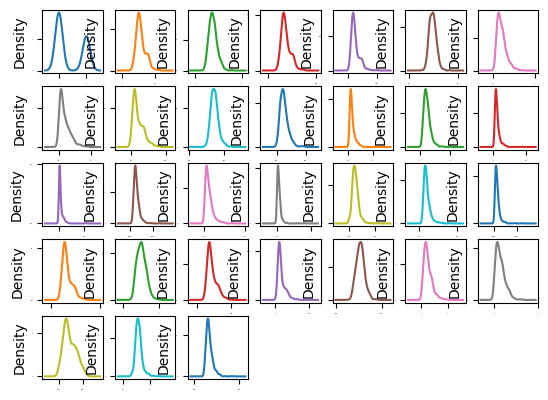

In [47]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

In [49]:
print(df.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


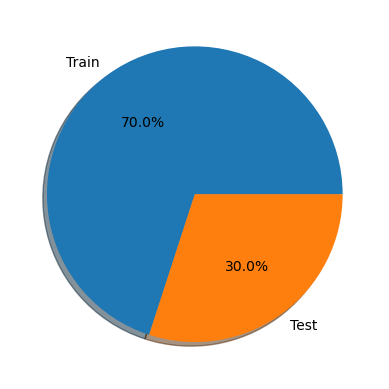

Train set (398, 31)
Test set (171, 31)


In [50]:
#split our data into train and test
traindf, testdf = train_test_split(df, test_size = 0.3)
labels = 'Train', 'Test'
plt.pie([70, 30], labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()
print("Train set", traindf.shape)
print("Test set", testdf.shape)

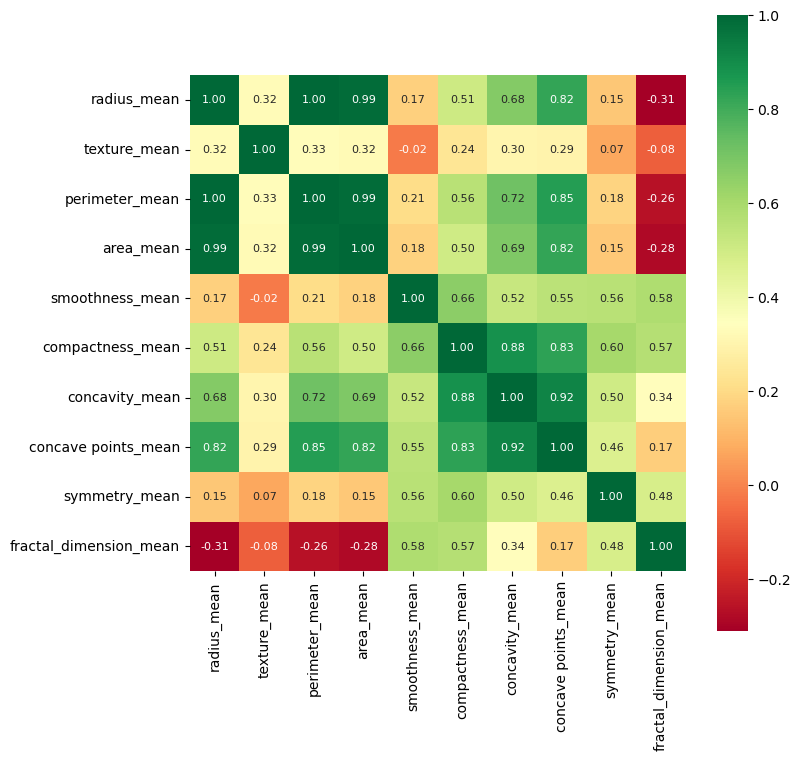

In [51]:
features_mean= list(df.columns[1:11])
corr = df[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'RdYlGn') 
plt.show()

#### Observation

 - the radius, parameter and area are highly correlated as expected from their relation so from these we will use anyone of them
 - compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
 - so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean

### Model Classification

In [52]:
#Generic function for making a classification model and accessing the performance. 
Y = df['diagnosis'].values
X = df.drop('diagnosis', axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size =0.30, random_state=21)
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(df[predictors],df[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(df[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,df[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kfold = KFold(n_splits=5)
  kfold.get_n_splits(X_train, Y_train)
  error = []
  for train, test in kfold.split(df[predictors]):
    # Filter training data
    train_predictors = (df[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = df[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(df[predictors].iloc[test,:], df[outcome].iloc[test]))
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(df[predictors],df[outcome]) 

### Logistic Regression model

In [53]:
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 89.807%
Cross-Validation Score : 78.947%
Cross-Validation Score : 83.333%
Cross-Validation Score : 87.135%
Cross-Validation Score : 88.596%
Cross-Validation Score : 88.222%


### Decision Tree Model

In [54]:
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 80.702%
Cross-Validation Score : 85.526%
Cross-Validation Score : 88.304%
Cross-Validation Score : 88.596%
Cross-Validation Score : 87.160%


In [55]:
predictor_var = ['texture_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 94.552%
Cross-Validation Score : 49.123%
Cross-Validation Score : 57.895%
Cross-Validation Score : 60.234%
Cross-Validation Score : 61.404%
Cross-Validation Score : 60.096%


### kNN Model

In [56]:
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
model= KNeighborsClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 92.970%
Cross-Validation Score : 78.070%
Cross-Validation Score : 83.772%
Cross-Validation Score : 87.135%
Cross-Validation Score : 88.377%
Cross-Validation Score : 88.047%


### SVM Model

In [57]:
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
model= SVC()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 89.631%
Cross-Validation Score : 74.561%
Cross-Validation Score : 80.263%
Cross-Validation Score : 85.673%
Cross-Validation Score : 87.719%
Cross-Validation Score : 88.229%


In [59]:
Y = df['diagnosis'].values
X = df.drop('diagnosis', axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)
models_list = []
models_list.append(('LR', LogisticRegression()))
models_list.append(('DT', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('KNN', KNeighborsClassifier()))
num_folds = 10
results = []
names = []
for name, model in models_list:
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=num_folds, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s:(run time: %f)" % (name, end-start))

LR:(run time: 0.317187)
DT:(run time: 0.062955)
SVM:(run time: 0.041971)
KNN:(run time: 0.043968)


### ANN 

In [60]:
from __future__ import print_function
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output
from keras.utils import plot_model

In [62]:
print("Row, Col", df.shape)# (row,col)

Row, Col (569, 31)


In [64]:
(df['diagnosis'][:398]==1).sum(),(df['diagnosis'][:398]==0).sum()

(173, 225)

In [65]:
(df['diagnosis'][398:]==1).sum(),(df['diagnosis'][398:]==0).sum()

(39, 132)

In [66]:
mat=df.values
mat.shape
mat

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 0.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

### Model training
**Using 2 Sigmoid Layers and RMSprop optimizer**

In [67]:
model2 = Sequential()
model2.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model2.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history01 = model2.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128,verbose=0)

In [68]:
score = model2.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.00870848074555397
Train accuracy: 0.9974874258041382


In [69]:
score = model2.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.1024407297372818
Validation accuracy: 0.9473684430122375


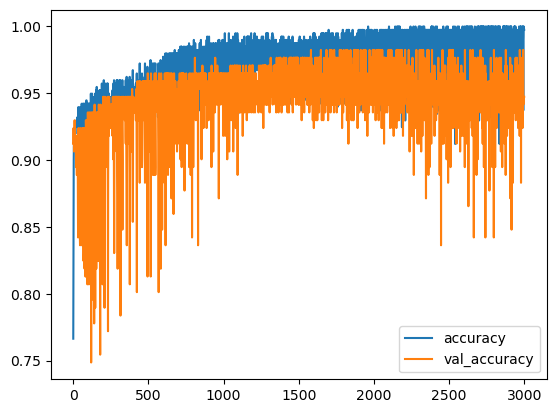

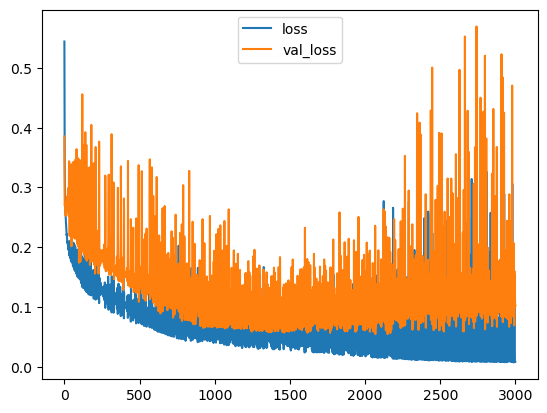

817


In [70]:
plt.plot(history01.history['accuracy'], label='accuracy')
plt.plot(history01.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history01.history['loss'], label='loss')
plt.plot(history01.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history01.history['accuracy']:
    if i>0.99:
        count+=1
print(count)

In [71]:
model2.save('model2.h5')
print("Avg Training acc: ", np.mean(history01.history['accuracy']),"\nAvg Testing accuracy: ", np.mean(history01.history['val_accuracy']))

Avg Training acc:  0.9747797305981318 
Avg Testing accuracy:  0.9446315809686978


### Using 3 Sigmoid Layers and RMSprop optimizer

In [72]:
model3 = Sequential()
model3.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model3.add(Dense(500, activation='sigmoid', use_bias=True))
model3.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history0 = model3.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128, verbose=0)

In [73]:
score2 = model3.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score2[0])
print('Train accuracy:', score2[1])

Train loss: 0.05390254408121109
Train accuracy: 0.9773869514465332


In [74]:
score2 = model3.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score2[0])
print('Validation accuracy:', score2[1])

Validation loss: 0.07552086561918259
Validation accuracy: 0.9824561476707458


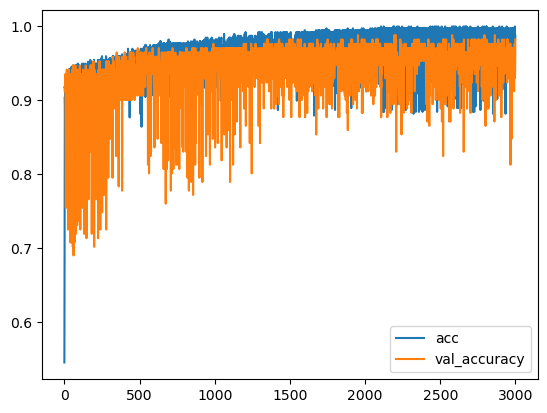

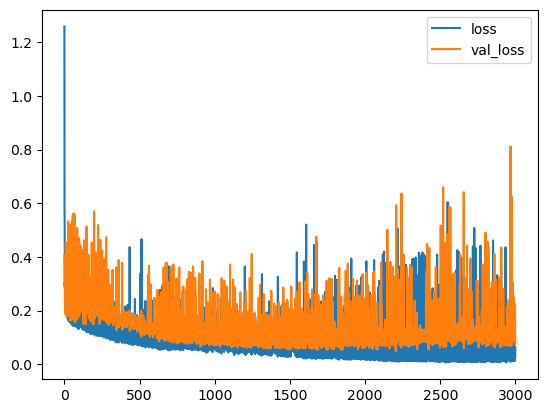

847


In [75]:
plt.plot(history0.history['accuracy'], label='acc')
plt.plot(history0.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history0.history['loss'], label='loss')
plt.plot(history0.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history0.history['accuracy']:
    if i>0.99:
        count+=1
print(count)

In [76]:
model3.save('model3.h5')
print("Avg Training acc: ", np.mean(history0.history['accuracy']),"\nAvg Testing accuracy: ", np.mean(history0.history['val_accuracy']))

Avg Training acc:  0.9694731977581977 
Avg Testing accuracy:  0.9422300205230713


### Using 4 Sigmoid Layers and RMSprop optimizer

In [77]:
model4 = Sequential()
model4.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model4.add(Dense(500, activation='sigmoid', use_bias=True))
model4.add(Dense(500, activation='sigmoid', use_bias=True))
model4.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model4.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128, verbose=0)

In [78]:
#model.evaluate(mat[:,1:],mat[:,0], batch_size=None, verbose=1, sample_weight=None, steps=None)
score = model4.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.11927355825901031
Train accuracy: 0.9572864174842834


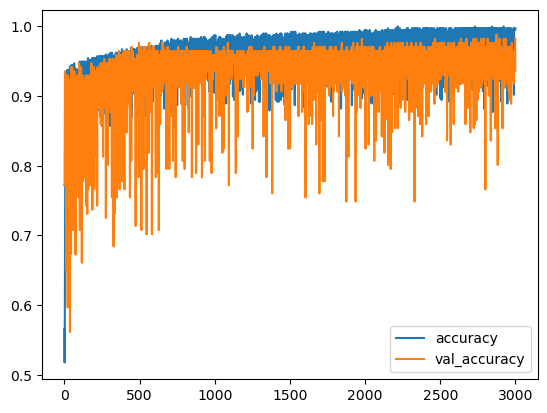

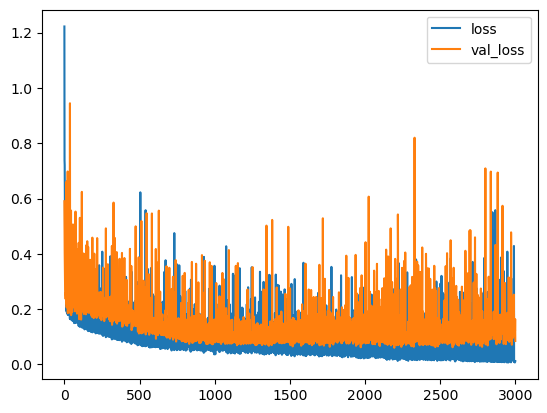

512


In [79]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history1.history['accuracy']:
    if i>0.99:
        count+=1
print(count)

In [80]:
model4.save('model4.h5')
print("Avg Training accuracy: ", np.mean(history1.history['accuracy']),"\nAvg Testing accuracy: ", np.mean(history1.history['val_accuracy']))

Avg Training accuracy:  0.9651122269630432 
Avg Testing accuracy:  0.9349142304460207


### Using 4 Sigmoid Layers and SGD optimizer

In [81]:
model7 = Sequential()
model7.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model7.add(Dense(500, activation='sigmoid', use_bias=True))
model7.add(Dense(500, activation='sigmoid', use_bias=True))
model7.add(Dense(1, activation='sigmoid'))
keras.optimizers.SGD(lr=0.01)
#keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model7.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model7.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128, verbose=0)

In [82]:
score = model7.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.35780593752861023
Train accuracy: 0.9045225977897644


In [83]:
score = model7.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.30087125301361084
Validation accuracy: 0.9298245906829834


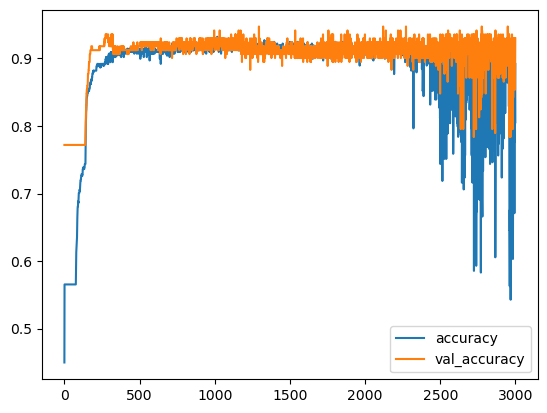

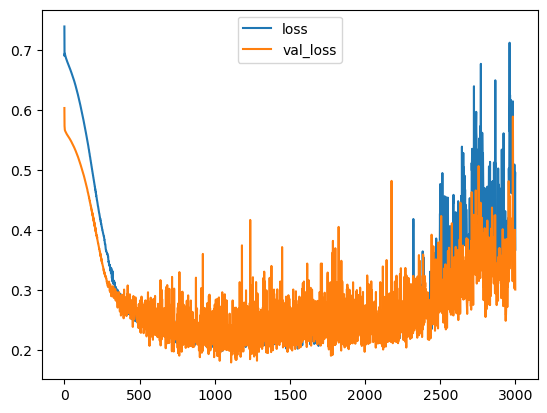

0


In [84]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history2.history['accuracy']:
    if i>0.99:
        count+=1
print(count)

In [85]:
model7.save('model7.h5')
print("Avg Training accuracy: ", np.mean(history2.history['accuracy']),"\nAvg Testing accuracy: ", np.mean(history2.history['val_accuracy']))

Avg Training accuracy:  0.8835820750991503 
Avg Testing accuracy:  0.907230018099149


### Using 4 Sigmoid Layers and RMSprop optimizer with batch shuffle 

In [86]:
model6 = Sequential()
model6.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model6.add(Dense(500, activation='sigmoid', use_bias=True))
model6.add(Dense(500, activation='sigmoid', use_bias=True))
model6.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model6.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = model6.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=True,epochs=3000, batch_size=128, verbose=0)

In [87]:
score = model6.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.023334776982665062
Train accuracy: 0.9899497628211975


In [88]:
score = model7.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.30087125301361084
Validation accuracy: 0.9298245906829834
